# **Jyothshna Epanagandla**





# UNT ID : 11489606

# 1.About the model

In deep learning, a convolutional neural network (CNN) is class of the deep neural networks, which is applied to analyze visual images.

Generally, multiple layers of artificial neurons make up convolutional neural networks. Artificial neurons are mathematical functions that calculate the weighted sum of various inputs and output an activation value, similar to their biological counterparts. Each layer creates many activation functions that are passed on to the next layer when you input an image into a Convolution Network.

Basic characteristics such as horizontal or diagonal edges are generally extracted by the first layer. This information is passed on to the next layer, which is responsible for detecting more complicated features like corners and combinational edges. As we go further into the network, it can recognize increasingly more complex elements like objects, faces, and so on.

The classification layer generates a series of confidence ratings based on the activation map of the final convolution layer, which indicate how it belongs to a class. This is how CNN works.

# 2.Dataset

Details of given dataset are as follows :

This is image data of Natural Scenes around the world.
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data are separated in zip files. There are around 14k images in Train, 3k in Test, and 7k in Prediction.

Here we are importing necessary packages

In [ ]:
import pandas as pd
from pathlib import Path
import cv2
from PIL import Image
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models

In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model, Model
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import tensorflow as tf
from tensorflow.keras import optimizers

In [ ]:
from zipfile import ZipFile



```

```

# 3.Data Pre-Processing

Here we are reading images and then we are resizing it to 150*150.
Then we are returning images & their category.

In [ ]:
def rd_image(dataset_dir, img_cat):
    images=[]
    classes =[]
    if len(img_cat)!=0:
      for dir_image in img_cat:
          for path in Path(dataset_dir+'/'+dir_image).iterdir():
              if path.name.endswith('.jpg'):
                      image = cv2.imread(str(path))
                      image = cv2.resize(image,(150,150))  
                      images.append(image)
                      classes.append(dir_image)
    elif len(img_cat) == 0:
      for path in Path(dataset_dir).iterdir():
              if path.name.endswith('.jpg'):
                      image = cv2.imread(str(path))
                      image = cv2.resize(image,(150,150))  
                      images.append(image)
    return images, classes

In [ ]:
#Displaying image
def image_under_display(images, classes, rows, columns):
    plt.subplots_adjust(0,0,3,3)
    for i in range(0,rows*columns):
        random_no = randint(0, len(train_img))
        image = images[random_no]
        plt.subplot(rows,columns,i+1)
        plt.title(classes[random_no])
        plt.axis('off')
        plt.imshow(image)

Here we are encoding

In [ ]:
def encoder(classes):
  class_cat ={'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
  label = [class_cat[item] for item in classes]
  return label

Here we are decoding

In [ ]:
def decoder(class_code):
    label = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain', 6:'unknown'}
    return label[class_code]

Here we are unzipping the files

In [ ]:
def unzipfile(zipfile):
  with ZipFile(zipfile, 'r') as zipObj:
    zipObj.extractall()

Here we are setting stopping point

In [ ]:
early_stp = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

Here we are assigning checkpoint to the model so that we can keep saving the model as physical file

In [ ]:
model_cpt = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

Here we are cross validating function

In [ ]:
def cross_validation(n_folds, X, y, model):
  mod_hist = []
  for i in range(n_folds):
      print("Training on Fold: ",i+1)
      mod_hist.append(model.fit(X, y, epochs=20, callbacks=[early_stp],
              verbose=1, validation_split=0.1))
      print("======="*12, end="\n\n\n")

  return mod_hist

Here we are defining category list

In [ ]:
img_cat = ['buildings','forest','glacier','mountain','sea','street']
train_cat = 'seg_train'

Here we are unzipping training file

In [ ]:
unzipfile('seg_train.zip')

Here we are reading images in training set

In [ ]:
train_img, train_cls = rd_image('/content/seg_train/seg_train', img_cat)

Here we are converting images to numpy array so that we make fast operations

In [ ]:
train_img = np.array(train_img)
train_cls = np.array(train_cls)

# 4.Data visualization

Here we are obtaining the shape of images and classes

In [ ]:
print('Shape of Images:', train_img.shape)
print('Shape of Classes:', train_cls.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Classes: (14034,)


Here we are exhibiting 25 random images from the given training set

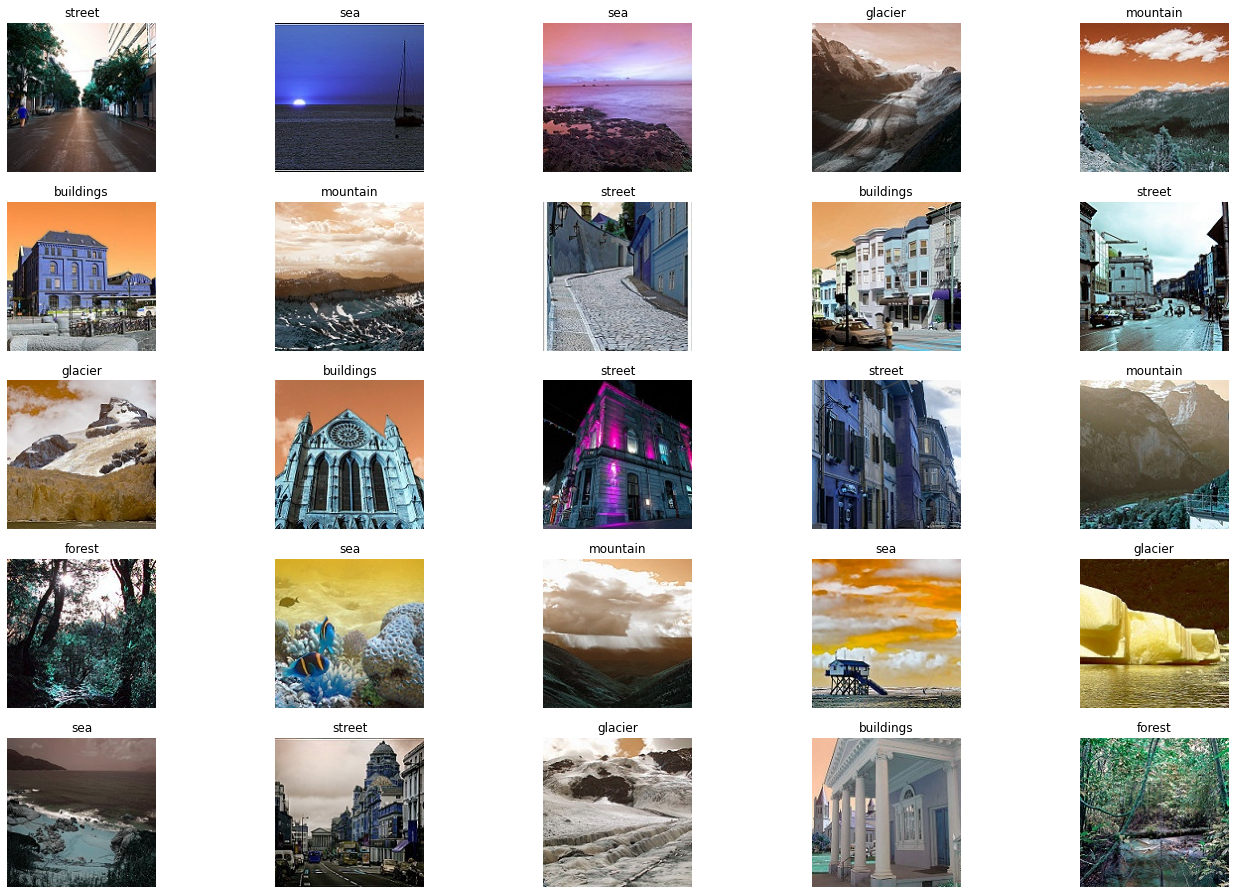

In [ ]:
image_under_display(train_img, train_cls, 5, 5)

**4. CNN model**

In [ ]:
train_lbls = encoder(train_cls)
train_lbls = np.array(train_lbls)

Here we are developing CNN model for Image classification using activation capacity i.e., relu, Pooling capacity i.e., MaxPool2D and Filter Function i.e., Conv2D

In [ ]:
model=Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',inp_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

# 5.Applying the model

As discussed earlier in CNN we have multiple layers. Here we using 10 layers where in each layer the model exactness and approval precision are recorded and then train information is parted into train and approval set. Through this procvess for every layer the preparation is stopped after 2 nonstop ages where the approval misfortune isn't moved along. In the end, the after effects of cross approval are obtained.

In [ ]:
mod_hist = cross_validation(10, train_img, train_lbls, model)

Training on Fold:  1
Epoch 1/20
395/395 [==============================] - 130s 236ms/step - loss: 1.7019 - accuracy: 0.3443 - val_loss: 1.9045 - val_accuracy: 0.0997
Epoch 2/20
395/395 [==============================] - 90s 228ms/step - loss: 1.1643 - accuracy: 0.5522 - val_loss: 1.2237 - val_accuracy: 0.4131
Epoch 3/20
395/395 [==============================] - 91s 231ms/step - loss: 0.9530 - accuracy: 0.6515 - val_loss: 1.5259 - val_accuracy: 0.5484
Epoch 4/20
395/395 [==============================] - 92s 234ms/step - loss: 0.8553 - accuracy: 0.7001 - val_loss: 0.8807 - val_accuracy: 0.6766
Epoch 5/20
395/395 [==============================] - 93s 235ms/step - loss: 0.7504 - accuracy: 0.7364 - val_loss: 0.9926 - val_accuracy: 0.6090
Epoch 6/20
395/395 [==============================] - 93s 235ms/step - loss: 0.6694 - accuracy: 0.7663 - val_loss: 1.2653 - val_accuracy: 0.5335
Epoch 00006: early stopping


Training on Fold:  2
Epoch 1/20
395/395 [==============================] - 93s

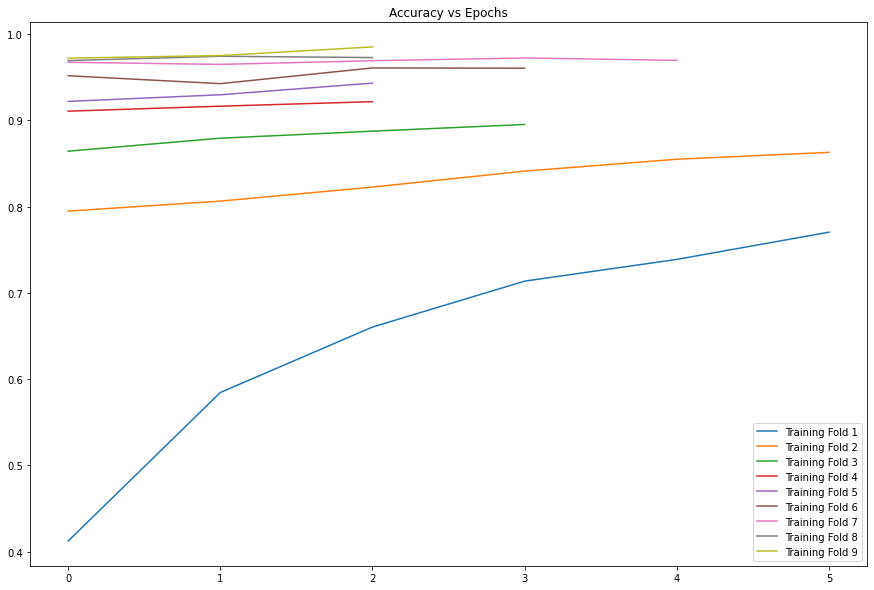

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Accuracy vs Epochs')
for i in range(0,9):
  plt.plot(mod_hist[i].history['accuracy'], label='Training Fold '+str(i+1))

plt.legend() 
plt.show()

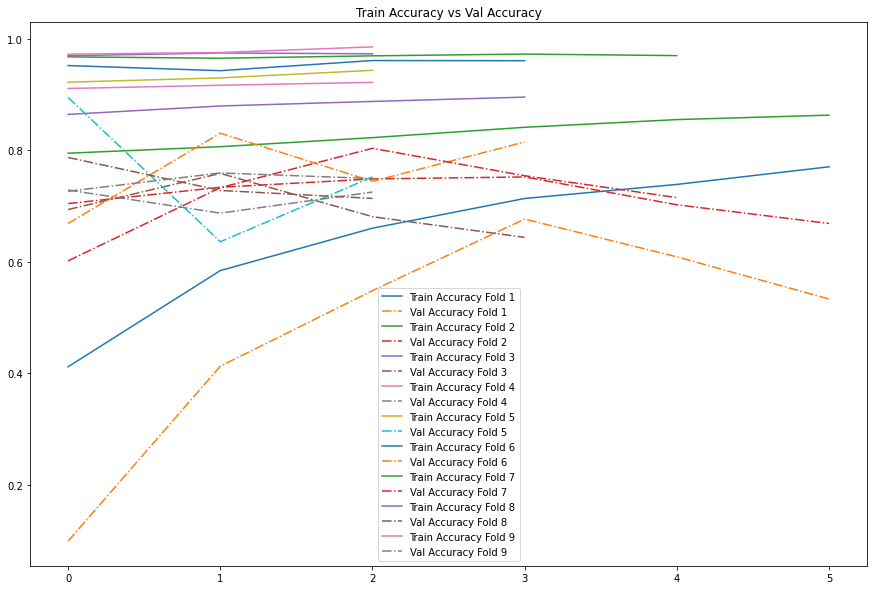

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Train Accuracy vs Val Accuracy')
for i in range(0,9):
  plt.plot(mod_hist[i].history['accuracy'], label='Train Accuracy Fold '+str(i+1))
  plt.plot(mod_hist[i].history['val_accuracy'], label='Val Accuracy Fold '+str(i+1), linestyle = "dashdot")
plt.legend()
plt.show()

# 6.Validation of test data

In [ ]:
# Here we are finding model accuracy using test data, at first we are reading test images and labels
unzipfile('seg_test.zip')
test_img, test_cls= rd_image('/content/seg_test/seg_test', img_cat)

In [ ]:
#Here we are converting test images into numpy array
test_img = np.array(test_img)
test_cls = np.array(test_cls)

In [ ]:
#Here we are obtaining the shape of images and labels
print('Shape of Images:', test_img.shape)
print('Shape of Classes:', test_cls.shape)

Shape of Images: (3000, 150, 150, 3)
Shape of Classes: (3000,)


In [ ]:
#Here we are doing Label encoding for the test classes
test_lbls = encoder(test_cls)
test_lbls = np.array(test_lbls)

Here we are loading the model that was saved by ModelCheckpoint

In [ ]:
model.evaluate(test_img, test_lbls)

94/94 [==============================] - 9s 94ms/step - loss: 1.1157 - accuracy: 0.8473


[1.1156854629516602, 0.8473333120346069]

# 7.Prediction result



 Here we are Predicting the labels for the images that are new

In [ ]:
unzipfile('seg_pred.zip')
img_prediction, unknown = rd_image('/content/seg_pred/seg_pred', [])

In [ ]:
img_prediction = np.array(img_prediction)
img_prediction.shape

(7301, 150, 150, 3)

In [ ]:
def get_clslbl(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


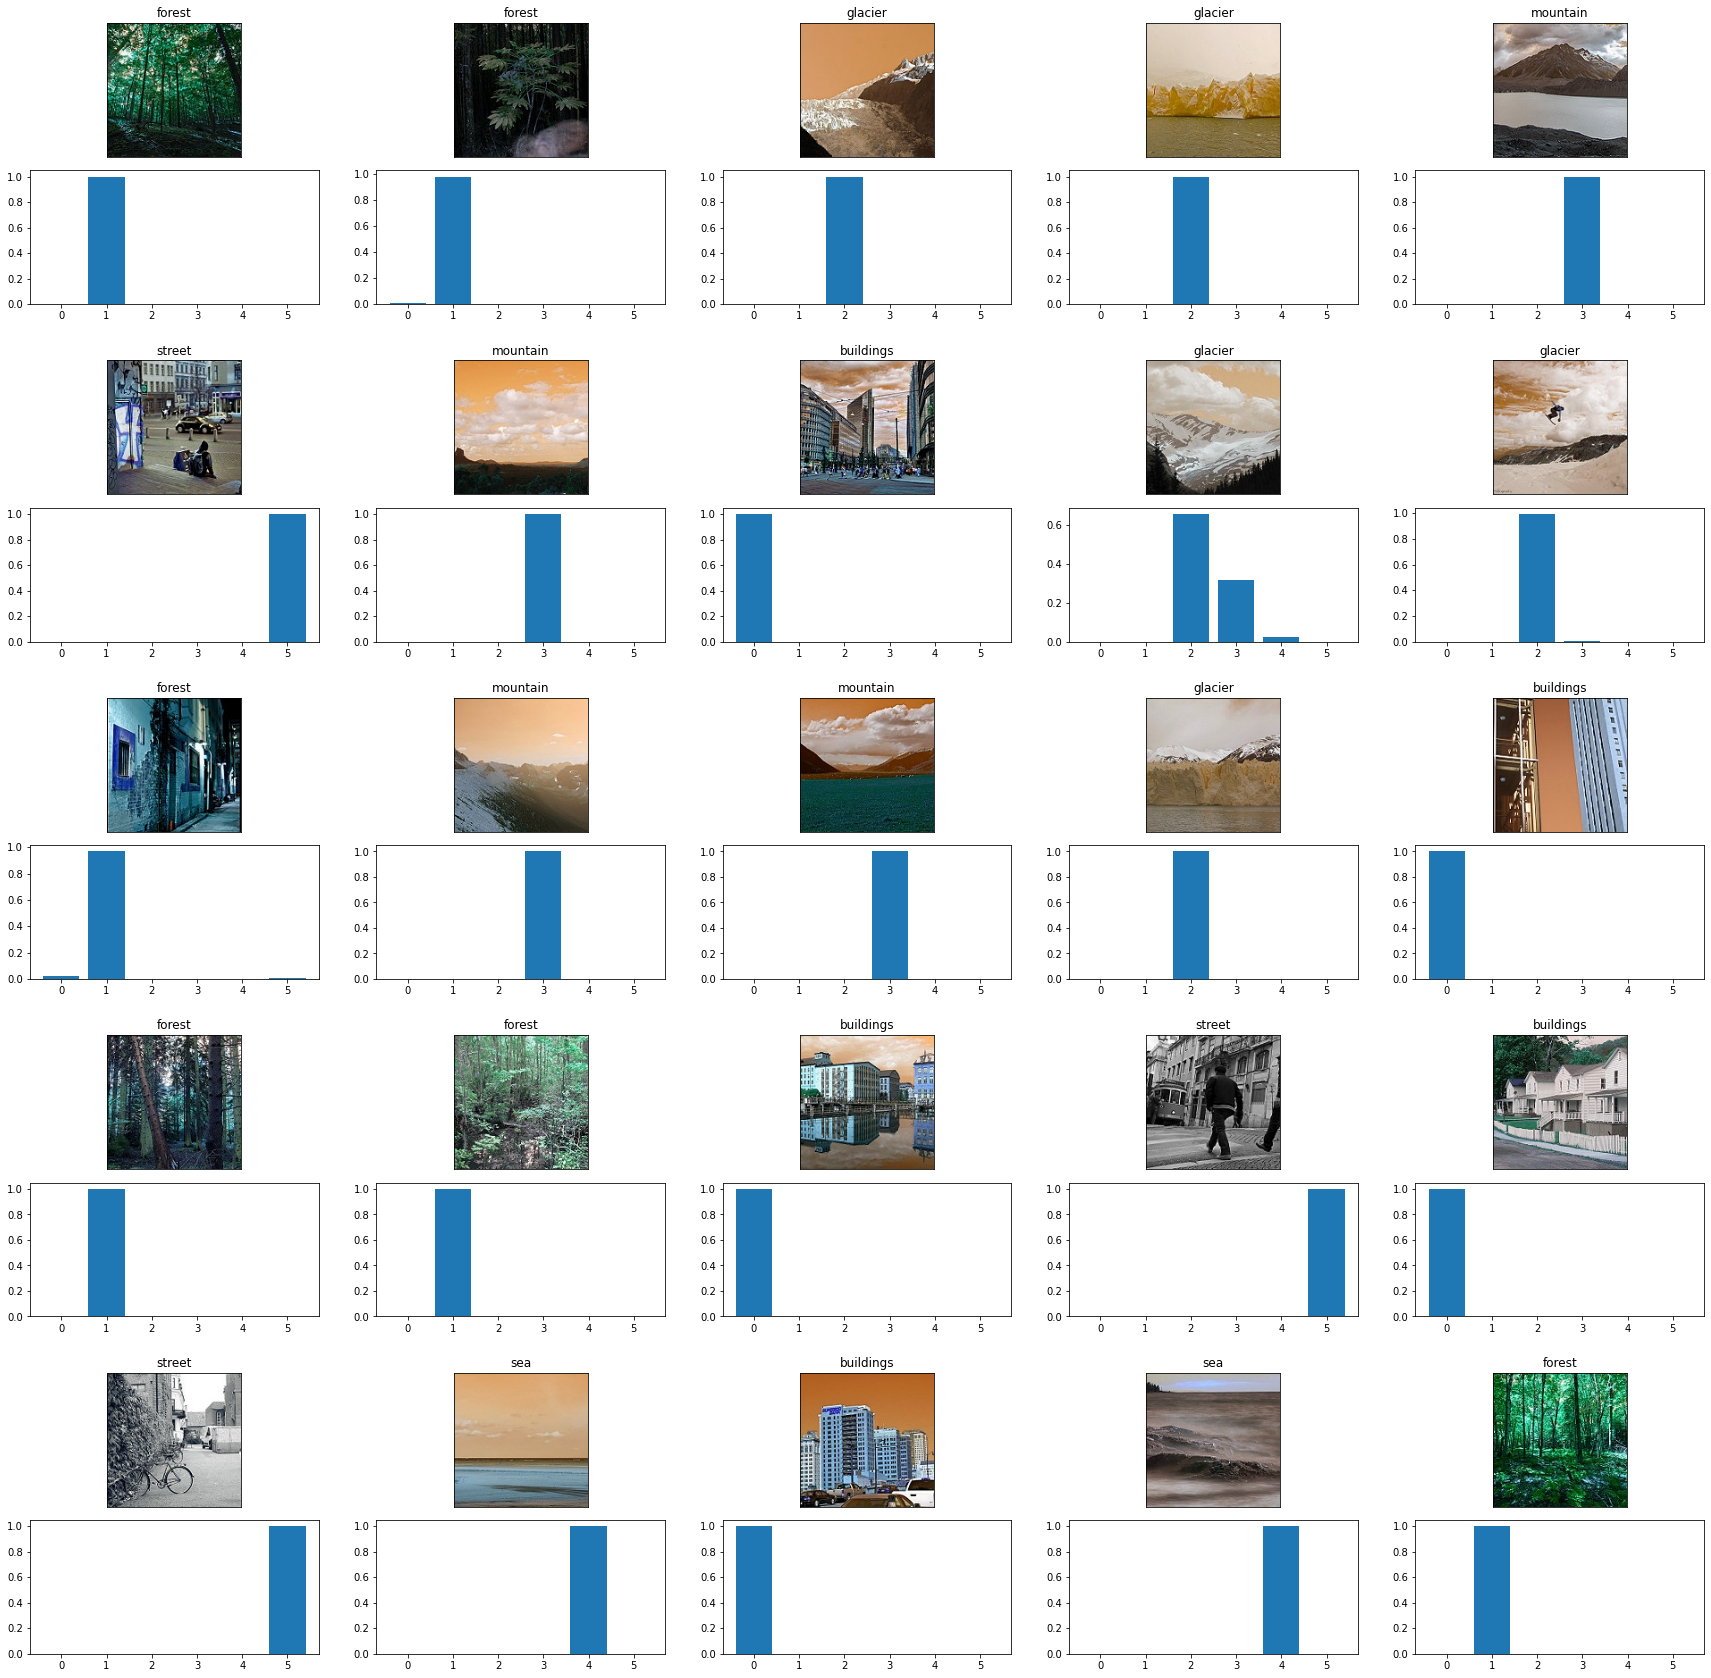

In [ ]:
# Herw we are visualizing the predicted classes.
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    random_num = randint(0,len(img_prediction))
    img_pred = np.array([img_prediction[random_num]])
    pred_class = get_clslbl(model.predict_classes(img_pred)[0])
    pred_prob = model.predict(img_pred).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(img_pred[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

# 8.Metrics

In [ ]:
pred = model.predict(test_img) 

In [ ]:
prediction_lbl = np.argmax(pred, axis = 1) 

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn

### Heatmap

Here we are plotting heat map

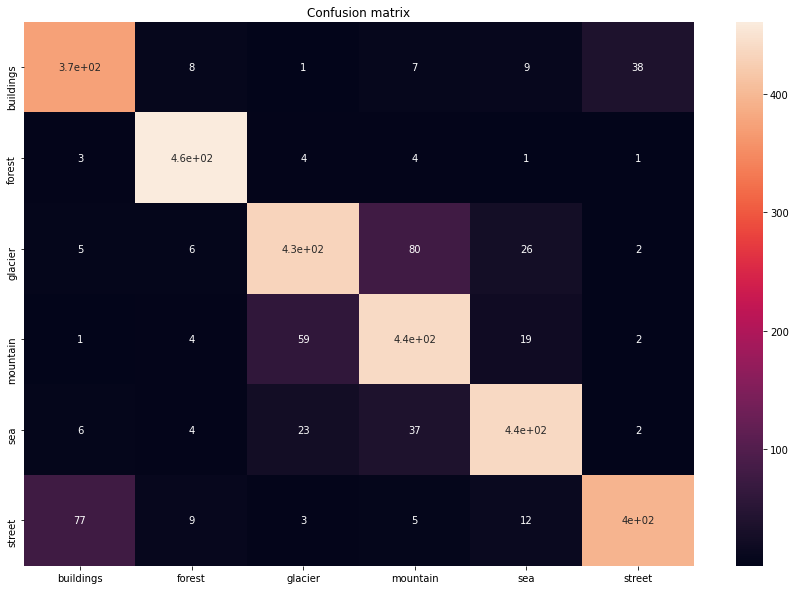

In [ ]:
ConfMat = confusion_matrix(test_lbls, prediction_lbl)
fig, ax = plt.subplots(figsize =(15,10))
ax = plt.axes()
sn.heatmap(ConfMat, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=img_cat, 
           yticklabels=img_cat, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
cls_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

def mislabld_image(cls_names, test_img, test_lbls, prediction_lbl):
    indi = (test_lbls == prediction_lbl)
    mislabld_ind = np.where(indi == 0)
    mislabld_img = test_img[mislabld_ind]
    mislabld_lbl = prediction_lbl[mislabld_ind]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(cls_names,  mislabld_img, mislabld_lbl)

### Transfer learning process

VGG i.e., visual geometry group is used.

In [ ]:
data_gen = ImageDataGenerator(rescale=1/255.,
                            horizontal_flip=True,
                            width_shift_range=0.1,
                            height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Here the data generators are assigned
from tensorflow.keras.preprocessing.image import ImageDataGenerator

inp_shp = (150,150)
batch_sz = 16
train_gen = data_gen.flow_from_directory('/content/seg_train/seg_train',
                                      target_size = inp_shp,
                                      class_mode='categorical',
                                      batch_size=batch_sz,
                                      shuffle=False)

test_gen = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                      target_size = inp_shp,
                                      class_mode='categorical',
                                      batch_size=batch_sz,
                                      shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model = Sequential()
L2 = tf.keras.regularizers.l2(0.001)
inp_shape = (150,150,3)


model = tf.keras.applications.VGG19(include_top=False, input_shape=inp_shape)
for layer in model.layers:
    layer.trainable=False
flat = Flatten()(model.layers[-1].output)
hidden1 = Dense(128,activation='relu')(flat)
output = Dense(6,activation='softmax')(hidden1)

model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_gen,
                   epochs=10,
                   validation_data = test_gen, )

Epoch 1/10
878/878 [==============================] - 104s 118ms/step - loss: 1.3438 - accuracy: 0.5733 - val_loss: 0.4440 - val_accuracy: 0.8393
Epoch 2/10
878/878 [==============================] - 93s 106ms/step - loss: 0.5176 - accuracy: 0.8024 - val_loss: 0.3938 - val_accuracy: 0.8540
Epoch 3/10
878/878 [==============================] - 94s 107ms/step - loss: 0.4460 - accuracy: 0.8300 - val_loss: 0.4900 - val_accuracy: 0.8113
Epoch 4/10
878/878 [==============================] - 94s 107ms/step - loss: 0.4076 - accuracy: 0.8467 - val_loss: 0.3648 - val_accuracy: 0.8630
Epoch 5/10
878/878 [==============================] - 94s 106ms/step - loss: 0.4063 - accuracy: 0.8433 - val_loss: 0.4041 - val_accuracy: 0.8520
Epoch 6/10
878/878 [==============================] - 93s 106ms/step - loss: 0.3882 - accuracy: 0.8542 - val_loss: 0.3793 - val_accuracy: 0.8527
Epoch 7/10
878/878 [==============================] - 94s 107ms/step - loss: 0.3842 - accuracy: 0.8499 - val_loss: 0.3896 - val_a

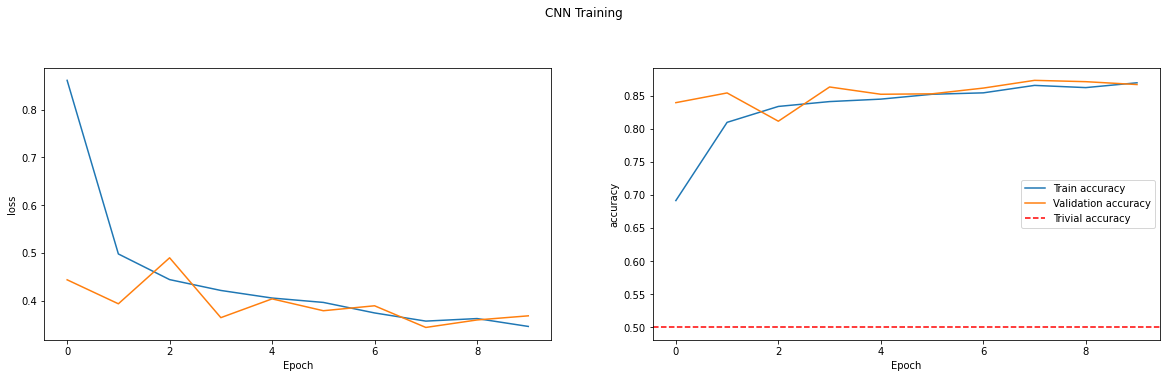

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
for i, m in enumerate(['loss', 'accuracy']): 
    ax[i].plot(history.history[m], label=('Train '+m))
    ax[i].plot(history.history['val_'+m], label='Validation '+m)
    if m == 'accuracy': ax[i].axhline(0.5, c='r', ls='--', label='Trivial accuracy')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel(m)
plt.suptitle('CNN Training', y=1.05)
plt.legend()

# 9. Conclusion

In [ ]:
m = model.evaluate(test_gen)
print(f'The Loss of evluation is: {m[0]}')
print(f'The Accuracy of evluation is: {m[1]:.2%}')

188/188 [==============================] - 8s 44ms/step - loss: 0.3686 - accuracy: 0.8667
The Loss of evluation is: 0.36861076951026917
The Accuracy of evluation is: 86.67%


CNN Model has same accuracy,predicted image is 86% correct and 14% incorrect

Transfer learning model also has same accuracy,predicted image is 86% correct  and 14% incorrect.